In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [2]:
%config Completer.use_jedi = False

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.shape

(303, 14)

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## EDA AND PRE-PROCESSING

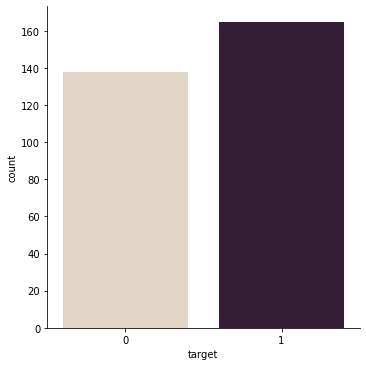

In [14]:
sns.catplot(x='target', kind='count', palette='ch:.25', data=data)
plt.show()

### Categorical predictive variables

sex:

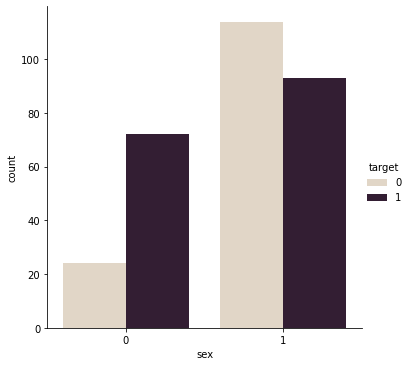

In [15]:
sns.catplot(x='sex', kind='count', hue='target', palette='ch:.25', data=data)
plt.show(

cp:

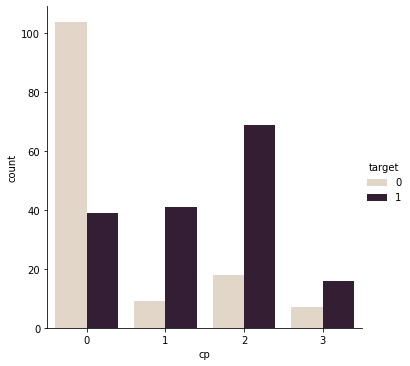

In [16]:
sns.catplot(x='cp', kind='count', hue='target', palette='ch:.25', data=data)
plt.show()

fbs:

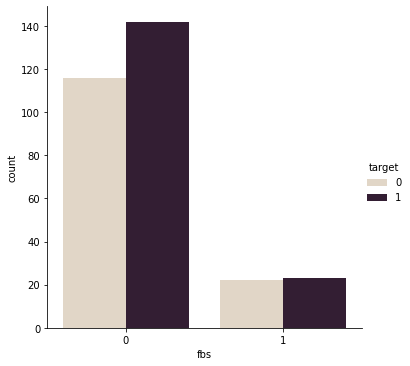

In [17]:
sns.catplot(x='fbs', kind='count', hue='target', palette='ch:.25', data=data)
plt.show()

restecg:

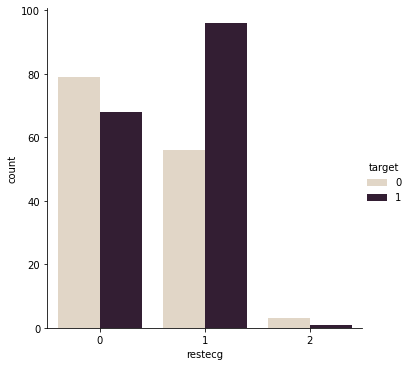

In [18]:
sns.catplot(x='restecg', kind='count', hue='target', palette='ch:.25', data=data)
plt.show()

exang:

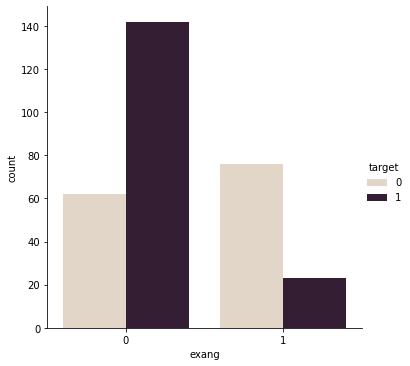

In [19]:
sns.catplot(x='exang', kind='count', hue='target', palette='ch:.25', data=data)
plt.show()

slope:

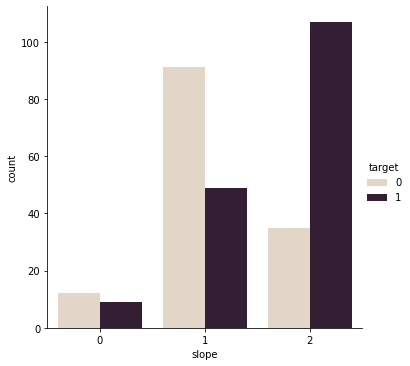

In [20]:
sns.catplot(x='slope', kind='count', hue='target', palette='ch:.25', data=data)
plt.show()

ca:

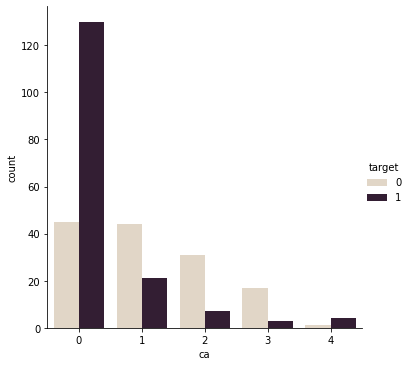

In [21]:
sns.catplot(x='ca', kind='count', hue='target', palette='ch:.25', data=data)
plt.show()

thal:

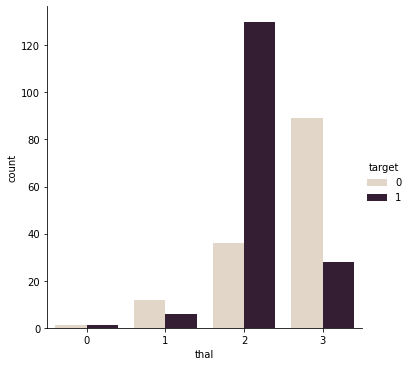

In [22]:
sns.catplot(x='thal', kind='count', hue='target', palette='ch:.25', data=data)
plt.show()

### Distributional predictive variables

In [26]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


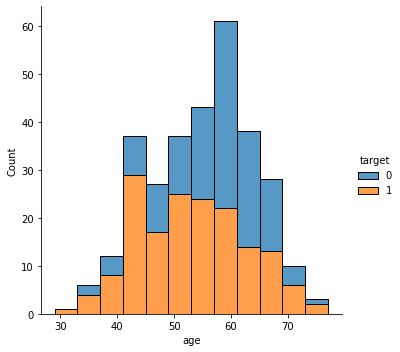

In [28]:
sns.displot(x='age', multiple='stack', hue='target', data=data)
plt.show()

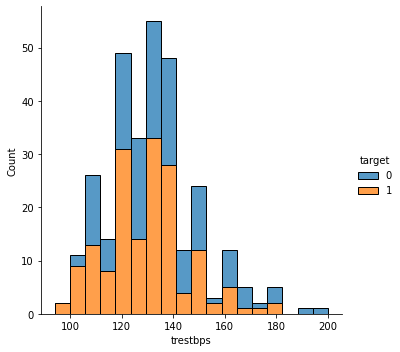

In [29]:
sns.displot(x='trestbps', multiple='stack', hue='target', data=data)
plt.show()

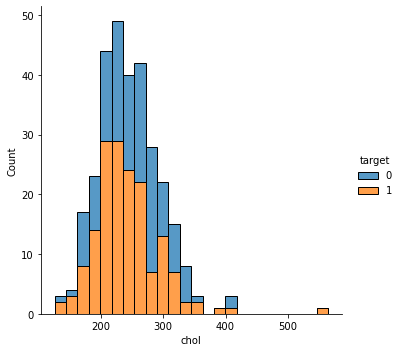

In [30]:
sns.displot(x='chol', multiple='stack', hue='target', data=data)
plt.show()

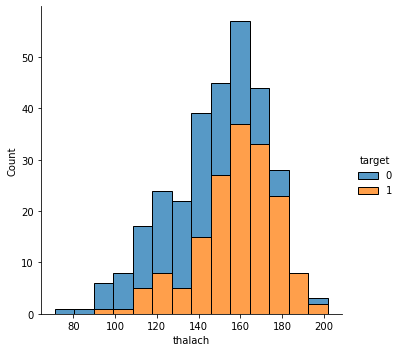

In [31]:
sns.displot(x='thalach', multiple='stack', hue='target', data=data)
plt.show()

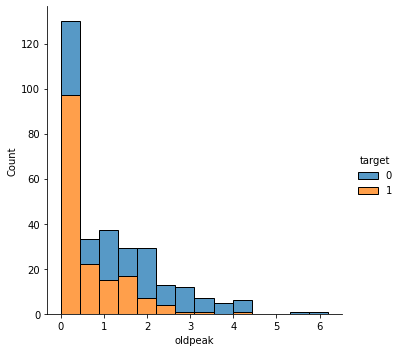

In [32]:
sns.displot(x='oldpeak', multiple='stack', hue='target', data=data)
plt.show()

## Splitting and pre-processing

In [35]:
x = data.drop('target' ,axis=1)
y = data['target']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling the data:

In [40]:
sc = StandardScaler()

In [50]:
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## Training the model

In [51]:
knn = KNeighborsClassifier()

parametres = {
    'n_neighbors' : [3, 5, 7, 9, 11],
    'weights' : ['uniform', 'distance']
}

In [52]:
grid = GridSearchCV(estimator=knn, param_grid=parametres, 
                   scoring='accuracy', cv=4)

In [53]:
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [54]:
print(grid.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


In [55]:
model = grid.best_estimator_

## Evaluating the model

Model score on the test data:

In [56]:
model.score(x_test, y_test)

0.9016393442622951

Confusion matrix:

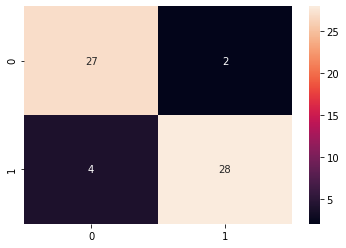

In [57]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [58]:
#confusion matrix structure

# y(x)=0  TN         FP

# y(x)=1  FN          TP

#        a(x)=0   a(x)=1

Calculating sensitivity, specificity, PPV and NPV:

In [59]:
TP = 28
FP = 2
TN = 27
FN = 4
sensitivity = TP / (TP+FN) * 100
specificity = TN / (TN + FP) * 100
ppv = TP / (TP + FP) * 100
npv = TN / (TN + FN) * 100

In [68]:
print('Sensitivity:', sensitivity, '%\n', 'Specificity:', specificity,
     '%\n', 'Positive predicitive value:', ppv, '%\n', 'Negative predicitive value:', npv, '%')

Sensitivity: 87.5 %
 Specificity: 93.10344827586206 %
 Positive predicitive value: 93.33333333333333 %
 Negative predicitive value: 87.09677419354838 %


AUC score:

In [72]:
probs = model.predict_proba(x_test)
auc = metrics.roc_auc_score(y_test, probs[:,1])
print(auc)

0.9154094827586208


ROC curve:

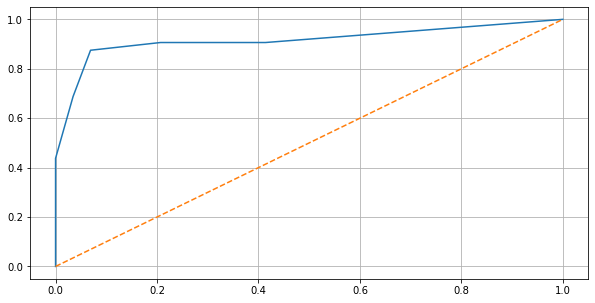

In [78]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs[:,1])
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.show()